# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

**1.Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`. Так же сразу ознакомимся с общей информацией о датафрейме с помощью метода `info()`.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #импортируем библиотеку для дальнейшей отрисовки графиков

try:
    df = pd.read_csv('real_estate_data.csv', sep='\t', 
        dtype={
            'total_images': 'int8',
            'rooms': 'int8',
            'floor': 'int8'
        }
    )
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', 
        dtype={
            'total_images': 'int8',
            'rooms': 'int8',
            'floor': 'int8'
        }
    )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int8   
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int8   
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int8   
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

После первого знакомства с данными из таблицы `real_estate_data.csv` было выявлено, что колонки [`'total_images'`], [`'rooms'`], [`'floor'`] имею данные и могут быть приведены к целочисленному типу данных `int8`. Для этого был использован аргумент `dtype` при чтении данных в датафрейм. Таким образом было сэкономлено 0.5 мб памяти. 
Так же необходимо привести название колонки [`'cityCenters_nearest'`] к общему стилю.

In [2]:
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

**2. Выведем первые 20 строчек датафрейма `df` на экран.**

In [3]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Основываясь на полученных данных при помощи методов `info()`, `head()` можно сделать однозначный вывод о наличии пропусков в данных.

**3.Построим общую гистограмму для всех колонок таблицы.**

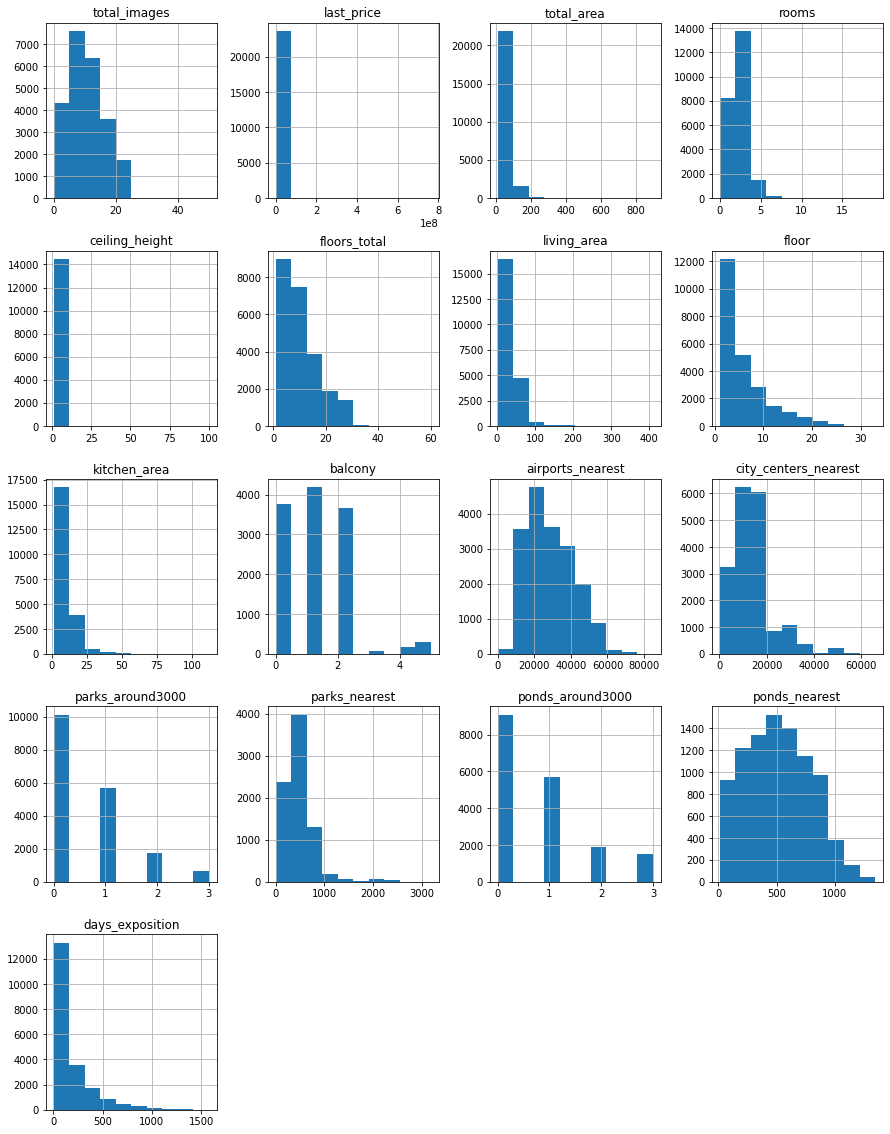

In [4]:
df.hist(figsize=(15, 20))
plt.show() # используем данный код для исключения из вывода графиков служебной текстовой информации

По гистограмам было выявлено, что в колонках [`'last_price'`], [`'total_area'`], [`'rooms'`], [`'ceiling_height'`], [`'living_area'`], [`'kitchen_area'`] есть аномально высокие значения в данных, которые не отражают действительность и внесены пользователями не корректно.

**4. В дополнение к гистограммам уточним основные количественные показатели по каждой колонке таблицы.**

In [5]:
df.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.369900e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.541549e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.088701e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.800000e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Действительно в вышеуказанных колонках имеются большие максимальные значения на порядок превосходящие среднее и медианное значения. Например по колонке [`'ceiling_height'`] есть данные со значением `высоты потолков` равное 100. Так как 75% объявлений содержат значение в пределах 2.8, то можно сделать вывод о том, что данный показатель указан в `м`. Значение равное 100 метрам скорее всего не может быть реальным и быть ккоректным. На этапе предобработки данных такие выбросы будут удалены или обработаны.

### Предобработка данных

#### Обработка пропусков

Наиболее важным и ценным при обработке пропусков в исходных данных является не полное избавление от них, связанное с заполнением средним и медианным значением или удалением, а нахождение связей с другими имеющимися данными, чтобы заполнить их более реальными значениями, не допустив значительных искажений в исходных данных. Хорошим показателем обработки пропусков с таким подходом будет на уровне 2-4% оставшихся пропусков, которые не сильно окажут влияние на дальнейшее исследование. Таким образом если по каким-то пропускам нет больше возможностей к нахождению приближенных значений можно оставить пропуски в виде `Nan`.

**Выведем количество пропущенных значений и их процентное соотношение по каждой колонке.**

In [6]:
pd.concat(
    [df.isna().sum(), (df.isna().sum() / len(df) * 100).round(2)],
    axis=1, 
    keys=['count', 'percent'],
    join='inner'
)

,count,percent
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
floor,0,0.00
is_apartment,20924,88.29


Пропуски в данных есть как в колонках, которые заполняет пользователь так и в полученных автоматически, которые заполняются на основе картографических данных. Если пропуски в пользовательских данных можно объяснить не заполнением их со стороны пользователя при составлении объявления, то со вторым типом можно предположить, что пропущенные значения либо означают отсутствие близости к определенным объектам инфраструктуры (`центр города`, `аэропорт`, `парк` и т.д.), либо алгоритм автоматичского заполнения данных при неправильном вводе пользователем местонахождения объекта недвижимости (наименование улицы, дома, района) не выдал картографических данных. 

##### по картографическим колонкам

Для начала необходимо проверить: нет ли пропусков в колонках `['parks_nearest']` и `['ponds_nearest']` при наличии значений больше `0` в колонках  `['parks_around3000']` и `['ponds_around3000']` соответственно.

In [7]:
display(df.loc[df['parks_around3000'] > 0, ['parks_nearest']].isna().sum())
display(df.loc[df['ponds_around3000'] > 0, ['ponds_nearest']].isna().sum())

parks_nearest    0
dtype: int64

ponds_nearest    0
dtype: int64

Таких пропусков нет. Значит пропуски в колонках `['parks_around3000']` и `['ponds_around3000']` не могут быть какой-то ошибкой со стороны автоматической системы. 

Так как в исходных данных есть только информация по населенному пункту, где расположен объект недвижимости без указания точного адреса, предлагается заполнить пропуски средним значением предварительно сгруппировав данные по колонке `['locality_name']`, но только после того как будут устранены неявные дубликаты в названиях населеных пунктов. Такое решение можно объяснить тем, что в среднем все объекты недвижимости находящиеся в определенном населенном пункте будут находится рядом с большими объектами инфраструктуры, такими как аэропорт, центр города, озеро, река и т.д. И для более приближенного среднего значения расстояния необходимо полное соответствие названий населенных пунктов без неявных дубликатов, которые могут быть определены как совсем другой населенный пункт (например «поселок Тельмана» и «посёлок Тельмана»). Такой подход в заполнении пропусков не должен сильно исказить данные. 

##### по колонке [`'ceiling_height'`]

По данной колонке имеется почти 39% пропусков. Так как средняя высота потолков по 75% процентам объявлений из выборки имеют стандартное значение в `2.8`м, то хорошим решением будет заполнение пропусков медианным значением. Для большей точности можно попробовать сгруппировать объявления по колонке [`'locality_name'`] и [`'floors_total'`]. Таким образом при заполнении пропусков будет учитываться не только общее количество этажей в доме, которое из всех представленных данных имеет скорее всего большее влияние на `высоту потолков`, но и место расположения объекта недвижимости, дополнительно группируя данные по району.

In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(
    df[['locality_name', 'floors_total', 'ceiling_height']]
    .groupby(['locality_name', 'floors_total'])['ceiling_height']
    .transform('median')
) 
df['ceiling_height'].isna().sum() #проверим сколько пропусков осталось после заполнения медианой

503

После заполнения пропусков по колонке [`'ceiling_height'`] осталось всего 503 пропуска или около 2% от всех значений. Так же по колонке [`'floors_total'`] имеется всего 86 пропусков или менее 0.5%. 

Можно заполнить оставшиеся пропуски общим медианным значением сгруппировав данные только по колонке [`'floors_total'`] и оставить оставшиеся пропуски `NaN` для того, чтобы не искажать данные без необходимости для дальнейшего EDA (исследовательского анализа данных). Удаление строк с пропусками допускать нельзя, так как они могут содержать другие параметры, которые могут сильнее оказывать влияние на целевой признак `стоимость`. Возможно на стадии обработки аномальных значений строки с пропусками (`Nan`) так же будут отброшены.

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(
    df[['floors_total', 'ceiling_height']]
    .groupby('floors_total')['ceiling_height']
    .transform('median')
) 
df['ceiling_height'].isna().sum() #проверим сколько пропусков осталось после заполнения медианой

78

##### по колонкам [`'living_area'`] и [`'kitchen_area'`]

По данным колонкам имеется 8% и 9% пропусков соответственно. Так как 75% объявлений имеют значения в 42 кв.м. и 12 кв.м., что соответствует среднестатистичесим значениям для недвижимости в России и похоже на правду хорошим решением будет также заполнение пропусков медианным значением предварительно сгруппировав данные сначала по `населенному пункту` (колонке [`'locality_name'`]), а затем по `количеству комнат` (колонке [`'rooms'`]).

In [10]:
# сначала заполним пропуски в колонке 'living_area'
df['living_area'] = df['living_area'].fillna(
    df[['locality_name', 'rooms', 'living_area']]
    .groupby(['locality_name', 'rooms'])['living_area']
    .transform('median')
) 

#далее заполним пропуски в колонке 'living_area'
df['kitchen_area'] = df['kitchen_area'].fillna(
    df[['locality_name', 'rooms', 'kitchen_area']]
    .groupby(['locality_name', 'rooms'])['kitchen_area']
    .transform('median')
) 

#проверим сколько пропусков осталось после заполнения медианой
display("Пропусков по колонке ['living_area']", df['living_area'].isna().sum()) 
display("Пропусков по колонке ['kitchen_area']", df['kitchen_area'].isna().sum()) 

"Пропусков по колонке ['living_area']"

60

"Пропусков по колонке ['kitchen_area']"

256

После заполнения медианой пропущенных значений в колонках [`'living_area'`] и [`'kitchen_area'`] осталось 0.2% и 1% соответственно. При такой малой доле пропусков оставить их в значении NaN вполне оправдано. Это практически не повлияет на дальнейшее исследование. 

##### по колонке [`'is_apartment'`].

Для начала необходимо уточнить какие данные содержаться в данной колонке с типом `object`.

In [11]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Колонка [`'is_apartment'`] имеет будев тип и дает информацию о статусе недвижимости (для коммерческого использования или проживания). Отличие коммерческого использования состоит в том, что объект недвижимости нельзя использовать для постоянной регистрации места жительства, только для временной регистрации. То есть можно скзазать, что апартаменты это отдельная категория недвижимости, которая может использоваться только в коммерческих целях при сдаче в аренду например. Доля таких предложений на рынке всегда меньше доли некоммерческих предложений, поэтому количество пропусков в 20924 или 88% можно с уверенностью трактовать как значение `False`. Скорее всего пользователи заполняющие данные при формировании объявлений о продаже недвижимости в некоммерческих целях просто не отмечали данный признак и в базу данных заносились значения `NaN`. Таким образом заполнить пропуски знчением `False` будет хорошим решением, приравняв объявления с пропущенным значением к обычной недвижимости с некоммерческим статусом.

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)

df['is_apartment'].isna().sum() #проверим сколько пропусков осталось после заполнения медианой

0

##### по колонке [`'balcony'`].

Необходимо уточнить какие данные содержаться в данной колонке с типом `float64`.

In [13]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Как и предполагалось значение по данной колонке обозначает количество балконов. Как и на предыдущем этапе наличие пропусков количеством 11519 или 48% скорее всего можно объяснить тем, что большая часть пользователей не вносили данных если балконов нет. Можно попробовать сделать группировку данных по `количеству комнат` и посмотреть какие значения по `количеству балконов` соотвествуют этоту признаку. Гипотеза: чем больше комнат в объекте недвижимости, тем больше балконов.

In [14]:
df[['rooms', 'balcony']].groupby('rooms').agg(['median', 'count'])

balcony      
       median count
rooms              
0         2.0   126
1         1.0  4228
2         1.0  4130
3         1.0  2954
4         1.0   528
5         1.0   139
6         1.0    37
7         1.0    27
8         0.0     4
9         0.5     2
10        1.0     3
11        NaN     0
12        NaN     0
14        0.0     1
15        NaN     0
16        1.0     1
19        NaN     0

В результате обнаружено что большая часть пропущенных значений по колонке [`'balcony'`] содержится в объявлениях с недвижимостью, где число комнат больше 10. Так же стоит отметить что гипотеза о том, что чем больше комнат в недвижимости, тем больше количество балконов не оправдалась. Это подтверждает и описательная статистика, полученная с помощью метода `describe()`. Согласно статистике 50% объявлений имеют не более 1 балкона, а 75% - не более 2 балконов. 

Таким образом при отсутствии какой-либо связи количества балконов с количеством комнат, хорошим решением будет всё-таки траткотавть пропуски, как отсутствие балконов, которые пользователи в данном варианте не стали указывать и заполнить значением `0`.

In [15]:
df['balcony'] = df['balcony'].fillna(0)

df['balcony'].isna().sum() #проверка оставшихся пропущенных значений

0

##### по колонке [`'locality_name'`].

Так как восстановление названий населённых пунктов не представляется возможным в рамках текущего проекта и колчество пропусков не велико (49 пропусков или 0.2%) заменим их значением `'unknown'`.

In [16]:
df['locality_name'] = df['locality_name'].fillna('unknown')

df['locality_name'].isna().sum() #проверка оставшихся пропущенных значений

0

##### по колонке [`'days_exposition'`].

В связи с тем, что в исходных данных отсутствует колонка с датой закрытия объявления (снятия с публикации), то заполнить пропуски по колонке [`'days_exposition'`] методом вычисления разницы даты снятия и даты публикации нет возможности. Из всех представленных данных по которым можно приближенно востановить пропуски медианным значением является колонка [`'total_area'`] либо колонка [`'rooms'`]. Колонка [`'rooms'`] будет более предпочтительней, так как является практически категориальным представлением [`'total_area'`]. В целом можно сказать, что чем больше комнат недвижимости тем больше её площадь. 
Для проверки гипотезы:
* сгруппируем данные по `количеству комнат` недвижимости и посчитаем медианное значение `общей площади` по каждой группе объявлений и количество таких объявлений для подтверждения/опровержения первой части гипотезы;
* сгруппируем данные по `количеству комнат` недвижимости и посчитаем медианное значение `количества дней публикации` по каждой группе объявлений и количество таких объявлений для подтверждения/опровержения второй части гипотезы .

In [17]:
df[['rooms', 'total_area']].groupby('rooms').agg(['median', 'count'])

total_area      
          median count
rooms                 
0          26.05   197
1          36.56  8047
2          53.00  7940
3          73.00  5814
4          99.30  1180
5         146.45   326
6         184.30   105
7         214.00    59
8         235.70    12
9         300.95     8
10        272.60     3
11        188.90     2
12        900.00     1
14        304.20     2
15        590.00     1
16        270.00     1
19        374.60     1

In [18]:
df[['rooms', 'days_exposition']].groupby('rooms').agg(['median', 'count'])

days_exposition      
               median count
rooms                      
0                50.0   183
1                81.0  7273
2                91.0  6913
3               114.0  4819
4               156.0   941
5               185.5   252
6               201.5    76
7               138.0    37
8               249.0    11
9               469.5     4
10               44.0     2
11              813.0     1
12              106.0     1
14              256.5     2
15               14.0     1
16             1365.0     1
19              114.0     1

Гипотеза подтвердилась. Для основной части объявлений с недвижимостью, имеющей количество комнат до 9 включительно, имеется связь с общей площадью и количеством дней публикации. Чем больше количество комнат, тем больше обшая площадь и объявление дольше находится в публикации до момента покупки. Этот результат скорее всего можно объяснить тем, что спрос на недвижимость очень высок на недвижимость с небольшой площадью.

Таким образом будет хорошим решением заполнить пропущенные значения по колонке [`'days_exposition'`] её медианным значением предварительно сгруппировав данные по `количеству комнат`. 

In [19]:
df['days_exposition'] = df['days_exposition'].fillna(
    df[['rooms', 'days_exposition']]
    .groupby('rooms')['days_exposition']
    .transform('median')
)

df['days_exposition'].isna().sum() #проверим остались ли пропуски после заполнения

0

#### Изменение типов данных

Для начала необходимо вывести тип данных по каждой колонке.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int8   
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int8   
 5   ceiling_height        23621 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23639 non-null  float64
 8   floor                 23699 non-null  int8   
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23443 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Исходя из описания значений к таблице в колонках `['floors_total']`, `['balcony']`, `['parks_around3000']`, `['ponds_around3000']` и `['days_exposition']` находятся целочисленные данные, поэтому их необходимо привести к типу `'int'`. Но в связи с тем, что в колонках `['floors_total']`, `['parks_around3000']`, `['ponds_around3000']` есть пропуски приведение их к типу `'int'` вызовет ошибку. Оставить тип `'float'` допустимо в таком случае, так как этот тип так же позволяет проводить математические операции.Оставшиеся колонки приведем к типу `'int'`.

In [21]:
df['balcony'] = df['balcony'].astype('int8')
df['days_exposition'] = df['days_exposition'].astype(int)

Колонку `['first_day_exposition']` необходимо привести к типу `'datetime'` для дальнейшей работы с датой.

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        23621 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23639 non-null  float64       
 8   floor                 23699 non-null  int8          
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23443 non-null  float64       
 13  balcony         

#### Обработка дубликатов

Перед дальнейшим исследованием необходимо обязательно устранить явные и неявные дубликаты в данных.

Сначала проверим есть ли в данных явные дубликаты.

In [24]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено.

Далее проверим колонки со строковыми значениями на наличие неявных дубликатов. Такая колонка в данных только одна - `['locality_name']`.  

In [25]:
sorted(df['locality_name'].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

Из выведенного и отсортированного списка трудно определить неявные дубликаты, так как сортировка произведена не по названию населенного пункта, а по его типу. 

Гипотеза: так как каждый пользователь может по разному указать полное нименование одного и того же населенного пункта (например поселок или посёлок, посёлок или посёлок городского типа, посёлок или деревня и т.д.) при сортировки значений они будут определены, как совершенно разные населенные пункты. Хорошим решением было бы взять за идеентичность название самого населенного пункта и считать его единственно верным.

Для проверки предлагается создать функцию, которая по данной колонке произведет перестановку названия населенного пункта в начало строки. Таким образом можно будет определить неявные дубликаты, где во вновь отсортированном списке значений по колонке `['locality_name']` будут совпадать названия населенных пунктов, но иметь разный тип. Определение названия населенного пункта будет производится по наличию заглавной буквы. Напишем функцию.

In [26]:
# Функция возвращает новую строку с перестановкой, где населенный пункт указан в начале. 
# Начало названия населенного пункта определяется по первому слову, начинающемуся с заглавной буквы.
def name_first(arg): # получаем строку
    list_word = arg.split(' ') # разбиваем строку на слова
    if len(list_word) <= 1: # если строка состоит из одного слова или меньше
        return arg # возвращаем строку без изменений

    for i in range(len(list_word)): # найдем первое слово начинающееся с заглавной буквы
        if list_word[i].istitle(): # если слово с текущим индексом начинается с заглавной буквы
            end = list_word[i:] # формируем список из найденного слова и слов идущих за ним
            end = ' '.join(end) # формируем строку из списка
            list_word = list_word[0: i] # обрезаем исходную строку до найденного слова
            break # останавливаем цикл
    
    return (end + ' ' + ' '.join(list_word)) # возвращаем новую строку, где название населенного пункта в начале строки

Создадим в датафрейм новую колонку под названием `['new_locality_name']`, куда будут записаны новые строки.

In [27]:
df['new_locality_name'] = df['locality_name'].apply(lambda x: name_first(x))

sorted(df['new_locality_name'].unique()) # снова отсортируем данные по новой колонке с названием

['unknown',
 'Агалатово деревня',
 'Александровская посёлок',
 'Алексеевка посёлок',
 'Аннино поселок',
 'Аннино посёлок',
 'Аро деревня',
 'Барышево поселок',
 'Батово деревня',
 'Бегуницы деревня',
 'Белогорка деревня',
 'Белоостров посёлок',
 'Бокситогорск',
 'Большая Вруда деревня',
 'Большая Ижора городской поселок',
 'Большая Ижора поселок городского типа',
 'Большая Пустомержа деревня',
 'Большие Колпаны деревня',
 'Большое Рейзино деревня',
 'Большой Сабск деревня',
 'Бор деревня',
 'Борисова Грива деревня',
 'Бугры поселок',
 'Бугры посёлок',
 'Будогощь городской посёлок',
 'Ваганово деревня',
 'Важины посёлок городского типа',
 'Вартемяги деревня',
 'Вахнова Кара деревня',
 'Вещево поселок станции',
 'Вещево посёлок при железнодорожной станции',
 'Виллози городской посёлок',
 'Вознесенье посёлок городского типа',
 'Возрождение поселок',
 'Возрождение посёлок',
 'Войсковицы поселок',
 'Войскорово посёлок',
 'Володарское поселок',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг

Гипотеза подтвердилась. Одни и те же населенные пункты имеют разный тип (например: `'Вещево поселок станции'` и `'Вещево посёлок при железнодорожной станции'` или например: `'Гарболово деревня'` и `'Гарболово поселок'`). Таким образом хорошим решенем было бы для устранения неявных дубликатов оставить в колонке `['new_locality_name']` только названия населенного пункта отрезав тип. Для этого напишем новую функцию, модифицировав функцию `name_first()`.

In [28]:
# Функция возвращает новую строку c названием только населенного пункта
# Начало названия населенного пункта определяется по первому слову, начинающемуся с заглавной буквы.
def only_name(arg): # получаем строку
    list_word = arg.split(' ') # разбиваем строку на слова
    if len(list_word) <= 1: # если строка состоит из одного слова или меньше
        return arg # возвращаем строку без изменений

    for i in range(len(list_word)): # найдем первое слово начинающееся с заглавной буквы
        if list_word[i].istitle(): # если слово с текущим индексом начинается с заглавной буквы
            end = list_word[i:] # формируем список из найденного слова и слов идущих за ним
            end = ' '.join(end) # формируем строку из списка
            break # останавливаем цикл
    
    return (end) # возвращаем новую строку

df['new_locality_name'] = df['locality_name'].apply(lambda x: only_name(x))

sorted(df['new_locality_name'].unique()) # снова отсортируем данные по новой колонке с названием

['unknown',
 'Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',


Проверим количество неявных дубликатов, которые были обработаны.

In [29]:
display(len(df['locality_name'].unique()))
display(len(df['new_locality_name'].unique()))

365

306

Из 365 значений наименований в исходных данных было 59 неявных дубликатов, которые были обработаны.

#### Обработка пропусков по картографическим колонкам - продолжение

После того как были обработаны неявные дубликаты по колонке `['locality_name']` можно заполнить пропуски по колонкам с картографическими значениями медианным значением превадрительно сгруппировав данные по наименование населённого пункта (колонке `['new_locality_name']`.

In [30]:
# заполним пропуски в колонке 'airports_nearest'
df['airports_nearest'] = df['airports_nearest'].fillna(
    df[['new_locality_name', 'airports_nearest']]
    .groupby('new_locality_name')['airports_nearest']
    .transform('mean')
) 

# заполним пропуски в колонке 'city_centers_nearest'
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(
    df[['new_locality_name', 'city_centers_nearest']]
    .groupby('new_locality_name')['city_centers_nearest']
    .transform('mean')
) 

# заполним пропуски в колонке 'parks_around3000'
df['parks_around3000'] = df['parks_around3000'].fillna(
    df[['new_locality_name', 'parks_around3000']]
    .groupby('new_locality_name')['parks_around3000']
    .transform('mean')
) 

# заполним пропуски в колонке 'parks_nearest'
df['parks_nearest'] = df['parks_nearest'].fillna(
    df[['new_locality_name', 'parks_nearest']]
    .groupby('new_locality_name')['parks_nearest']
    .transform('mean')
) 

# заполним пропуски в колонке 'ponds_around3000'
df['ponds_around3000'] = df['ponds_around3000'].fillna(
    df[['new_locality_name', 'ponds_around3000']]
    .groupby('new_locality_name')['ponds_around3000']
    .transform('mean')
) 

# заполним пропуски в колонке 'ponds_nearest'
df['ponds_nearest'] = df['ponds_nearest'].fillna(
    df[['new_locality_name', 'ponds_nearest']]
    .groupby('new_locality_name')['ponds_nearest']
    .transform('mean')
) 

df.isna().sum() # проверим сколько пропусков осталось после заполнения

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height            78
floors_total              86
living_area               60
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             256
balcony                    0
locality_name              0
airports_nearest        4829
city_centers_nearest    4829
parks_around3000        4829
parks_nearest           5998
ponds_around3000        4829
ponds_nearest           4938
days_exposition            0
new_locality_name          0
dtype: int64

Осталось довольно много пропусков по колонкам с картографическими данными. Скорее всего это связано с тем, что по некоторым населенным пунктам вообще отсутствует такая информация. При условии правильной работы автоматического алгоритма заполнения можно предположить, что рядом с данными населенными пунктами больших объектов и мест инфраструктуры просто нет. В таком случае для колонок `['parks_around3000']'` и `['ponds_around3000']'` хорошим решением будет заполнить пропуски значением `0`, что значит отсутствие в радиусе 3 км парков и озёр соответственно.
Что касается остальных колонок то заполнение их значением `0` будет неправильным решением, т.к. это можно было бы трактовать как непосредственную близость к объектам (расстоянию в 0 м). Единственное решение здесь - оставить пропуски со значением `Nan` .

In [31]:
df['parks_around3000'].fillna(0)
df['ponds_around3000'].fillna(0)

# повторно количество пропущенных значений и их процентное соотношение по каждой колонке
pd.concat(
    [df.isna().sum(), (df.isna().sum() / len(df) * 100).round(2)],
    axis=1, 
    keys=['count', 'percent'],
    join='inner'
)

,count,percent
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,78,0.33
floors_total,86,0.36
living_area,60,0.25
floor,0,0.00
is_apartment,0,0.00


#### Обработка аномальных значений

На начальном этапе при ознакомлении с данными методами `describe()` и `hist()` были обнаружены следующие аномалии в данных:
* Некоторые значения высоты потолков выходят за границы нормальных средних значений (среднее значение составляет 2.8 м). Минимальное значение составляет 1 м, максимальное значение - 100 м;
* По некоторым количественным колонкам есть выбросы (аномально высокие значения).

Для начала необходимо привести данные по колонке `['ceiling_height']` к приближенным к реальности данным. Данные, имеющие значения `выше 10 м` скорее всего введены пользователем не верно (указаны в размерности - `дм`) и должны быть поделены на 10 для приведения к `м`. Высоту потолков до `10 м` условно можно считать более-менее реальной. Такие значения могут быть характерны для 2-х и 3-х уровневых квартир. Для отфильтрованных данных создадим отдельный датафрейм `df_filtered`, для возможности работать с исходными неотфильтрованными данными.

In [32]:
df_filtered = df.copy() # создадим новый датафрейм
# приведем все значения высоты потолков к м
df_filtered['ceiling_height'] = (
    df['ceiling_height']
    .where(df['ceiling_height'] < 10, df['ceiling_height'] / 10)
)
# df_filtered.describe() # проверка изменений

Далее посмотрим какую долю составляют объявления с очень низкими для проживания среднестатистического человека потолками (возьмем 1.9 м) и не являются коммерческой недвижимостью.

In [33]:
len(df_filtered.query('ceiling_height < 1.9 & ~is_apartment')) / len(df_filtered) * 100

0.042195873243596776

Таких объявлений всего около `0.04%`. Удаление такого незначительного количества данных не должно повлиять на дальнейшие исследования.

In [34]:
df_filtered = df_filtered.query('ceiling_height >= 1.9 | is_apartment')
# df_filtered.query('ceiling_height < 1.9 & ~is_apartment') # проверка после фильтрации

Теперь необходимо обработать аномальные значения по оставшимся количественным признакам. В первую очередь выведем график boxplot для каждой оставшейся количественной колонки.

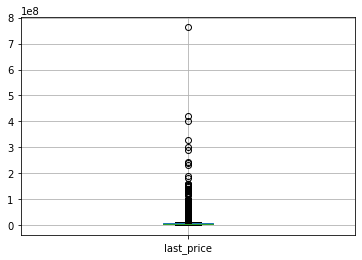

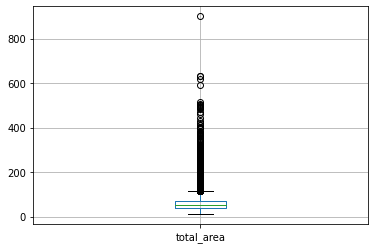

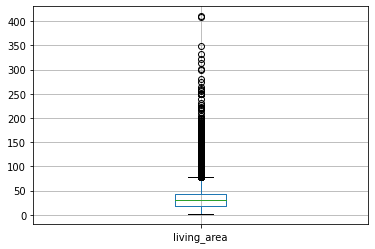

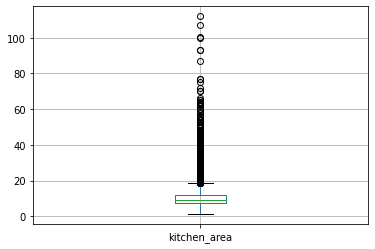

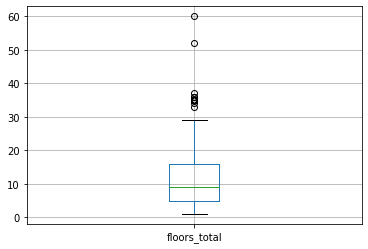

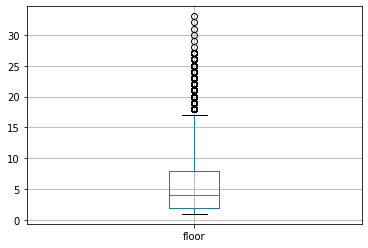

In [35]:
columns = [
            'last_price', 
            'total_area',  
            'living_area', 
            'kitchen_area',
            'floors_total',
            'floor'
            ]
for column in columns: # пройдемся в цикле по колонкам
    df.boxplot(column=column) # построим для каждой график boxplot
    plt.show()


Из графиков видно, что:
* по целевой колонке `['last_price']` имеются аномально высокие значения. Если доля объявлений со стоимостью недвижимости выше `2*10^8 руб.` незначительна, можно отсечь такие данные. Возможно такие объявления могут быть злонамеренным дейсвтием мошенников;
* по колонке `['total_area']` имеются аномально высокие значения. Если доля объявлений с общей площадью недвижимости выше `600 м3` незначительна, можно отсечь такие данные;
* по колонке `['living_area']` имеются аномально высокие значения. Если доля объявлений с жилой площадью недвижимости выше `300 м3` незначительна, можно отсечь такие данные;
* по колонке `['kitchen_area']` имеются аномально высокие значения. Если доля объявлений с площадью кухни выше `80 м3` незначительна, можно отсечь такие данные;
* по колонке `['floors_total']` имеются аномально высокие значения. Если доля объявлений с общим количеством этажей выше `40` незначительна, можно отсечь такие данные.

Проверим долю выбросов для каждой указанной колонки.

In [36]:
print(
    'Процент выбросов по последней стоимости недвижимости',
    round(len(df_filtered.query('last_price > 2*10**8')) / len(df_filtered) * 100, 2),
    '%'
)
print(
    'Процент выбросов по общей площади недвижимости',
    round(len(df_filtered.query('total_area > 600')) / len(df_filtered) * 100, 2),
    '%'
)
print(
    'Процент выбросов по жилой площади недвижимости',
    round(len(df_filtered.query('living_area > 300')) / len(df_filtered) * 100, 2),
    '%'
)
print(
    'Процент выбросов по площади кухни',
    round(len(df_filtered.query('kitchen_area > 80')) / len(df_filtered) * 100, 2),
    '%'
)
print(
    'Процент выбросов по общему количеству этажей в доме',
    round(len(df_filtered.query('floors_total > 40')) / len(df_filtered) * 100, 2),
    '%'
)

Процент выбросов по последней стоимости недвижимости 0.04 %
Процент выбросов по общей площади недвижимости 0.02 %
Процент выбросов по жилой площади недвижимости 0.03 %
Процент выбросов по площади кухни 0.03 %
Процент выбросов по общему количеству этажей в доме 0.01 %


По каждой колонке доля выбросов в укзанных выше пределах очень мала (менее 0.4%). Отфильтруем данные выбросы. 

In [37]:
df_filtered = df_filtered.query('last_price < 2*10**8')
df_filtered = df_filtered.query('total_area < 600')
df_filtered = df_filtered.query('living_area < 300')
df_filtered = df_filtered.query('kitchen_area < 80')
df_filtered = df_filtered.query('floors_total < 40')

# определим долю оставшихся данных после фильтрации
print(
    f'Доля оставшихся данных после фильтрации аномальных значений {len(df_filtered) / len(df):.2%}'
)

Доля оставшихся данных после фильтрации аномальных значений 98.38%


После фильтрации исходных данных получены более близкие по выборке данные без аномально высоких значений. Процент отфильтрованных данных составил 1.62% от исходных. Это не позволило потерять возможные статистически значимые значения для дальнейшего исследования. 

### Подсчет и добавление в таблицу новых столбцов

#### Цена одного квадратного метра

Подсчитаем цену одного квадратного метра и добавим новые значения в колонку `['one_sq_m_price']` сразу же округлив стоимость до копеек.

In [38]:
df_filtered['one_sq_m_price'] = (df_filtered['last_price'] / df_filtered['total_area']).round(2)

# проверим подсчет для первых 20 значений
# df_filtered['one_sq_m_price'].head(20)

#### День недели публикации объявления 

Создадим колонку `['day_public']` куда будет занесена информация о дне недели публикации объявления со следующими значениями:

* `0` - `понедельник`;
* `1` - `вторник`;
* `2` - `среда`;
* `3` - `четверг`;
* `4` - `пятница`;
* `5` - `суббота`;
* `6` - `воскресенье`.

In [39]:
df_filtered['day_public'] = pd.DatetimeIndex(df_filtered['first_day_exposition']).weekday

# выведем первые 20 строк датафрейма после внесения данных
# df_filtered.loc[:, ['first_day_exposition', 'day_public']]

#### Месяц публикации объявления

Создадим колонку `['month_public']` куда будет занесена информация о месяце публикации объявления.

In [40]:
df_filtered['month_public'] = pd.DatetimeIndex(df_filtered['first_day_exposition']).month

# выведем первые 20 строк датафрейма после внесения данных
# df_filtered.loc[:, ['first_day_exposition', 'month_public']]

#### Год публикации объявления

Создадим колонку `['month_public']` куда будет занесена информация о годе публикации объявления.

In [41]:
df_filtered['year_public'] = pd.DatetimeIndex(df_filtered['first_day_exposition']).year

# выведем первые 20 строк датафрейма после внесения данных
# df_filtered.loc[:, ['first_day_exposition', 'year_public']].head(20)

#### Тип этажа квартиры

Создадим колонку `['type_floor']` куда будет занесена информация о типе этажа расположения недвижимости со следующими значениями:

* `первый`;
* `песледний`;
* `другой`.

In [42]:
# создадим функцию, которая возвращает тип этажа квартиры
def type_floor(arg):
    if arg['floor'] == 1:
        return 'первый'
    elif arg['floor'] == arg['floors_total']:
        return 'последний'
    return 'другой'

df_filtered['type_floor'] = df_filtered.apply(lambda x: type_floor(x), axis = 1)

# выведем первые 20 строк датафрейма после внесения данных
# df_filtered.loc[:, ['floor', 'floors_total', 'type_floor']].head(20)

#### Расстояние до центра города

Создадим колонку `['dist_centr_city']` куда будет занесена информация о расстоянии до цента города в км от расположения объекта недвижимости. Так же округлим значения до целых.

In [43]:
df_filtered['dist_centr_city'] = round(df_filtered['city_centers_nearest'] / 1000)

# выведем первые 20 строк датафрейма после внесения данных
# df_filtered.loc[:, ['city_centers_nearest', 'dist_centr_city']].head(20)

### Исследовательский анализ данных

Начнем исследовательский анализ данных с построения диаграмм распределения определенного показателя  по частоте (гистограмм). Гистограммы позволят определить какие-либо закономерности в распределении признака.

#### Гистограммы распределения 

##### Гистограмма общей площади

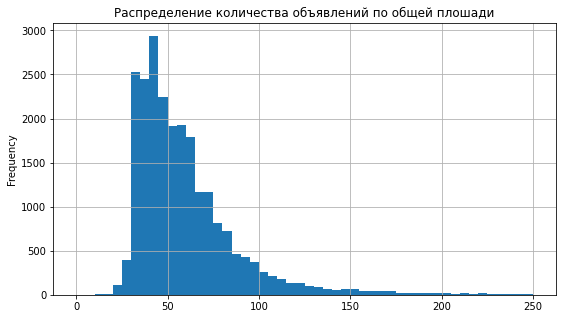

count    23315.000000
mean        60.256588
std         33.395768
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        500.000000
Name: total_area, dtype: float64

In [44]:
df_filtered['total_area'].plot(
    kind='hist',
    range=(0, 250),
    bins=50,
    title='Распределение количества объявлений по общей плошади',
    xlabel='Общая площадь, м2',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['total_area'].describe()

На гистограмме выявлено, что большая часть недвижимости из объявлений имеет `общую площадь` около `40-70 м2`. Недвижимости с `общей площадью` до `25 м2` и выше `150 м2` представлено в данных меньше всего.  

##### Гистограмма жилой площади

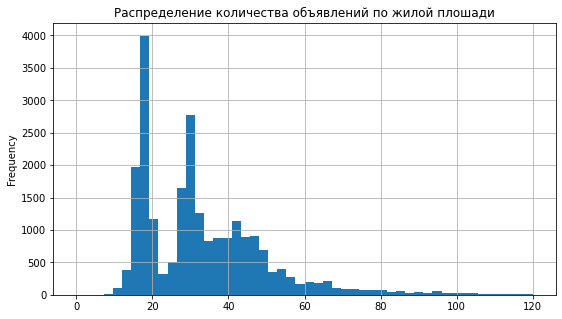

count    23315.000000
mean        34.285782
std         20.763215
min          2.000000
25%         18.500000
50%         30.100000
75%         42.600000
max        279.600000
Name: living_area, dtype: float64

In [45]:
df_filtered['living_area'].plot(
    kind='hist',
    range=(0, 120),
    bins=50,
    title='Распределение количества объявлений по жилой плошади',
    xlabel='Жилая площадь, м2',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['living_area'].describe()

На гистограмме наблюдается два явных пика в районе `18-19 м2` и `30 м2`, что может говорить о том, что основная часть недвижимости, имеющая `общую площадь` до `70 м2`, представленной в данных, чаще всего имеет несколько стандартных значений `жилой площади` (например многоквартирные дома, построенные по определнной серии). В общем `жилая площадь` в большей части данных имеет от `18` до `60 м2`.

##### Гистограмма площади кухни

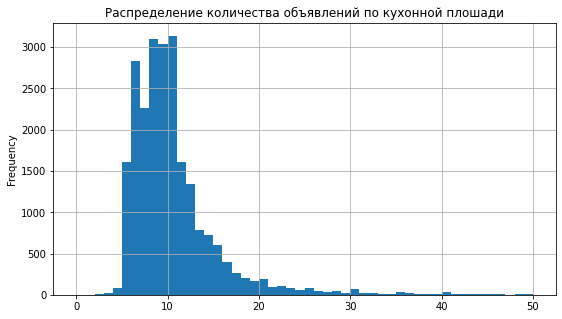

count    23315.000000
mean        10.429205
std          5.419053
min          1.300000
25%          7.160000
50%          9.300000
75%         11.645000
max         77.000000
Name: kitchen_area, dtype: float64

In [46]:
df_filtered['kitchen_area'].plot(
    kind='hist',
    range=(0, 50),
    bins=50,
    title='Распределение количества объявлений по кухонной плошади',
    xlabel='Площадь кухни, м2',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['kitchen_area'].describe()

На гистограмме видно что большая часть недвижимости, представленной в данных, имеет `площадь кухни` от `5` до `20 м2`. Присутствует незначительный пик на значении около `6-7 м2`. Это так же как и в случае с жилой площадью может быть характерным значением для определенных объектов недвижимости.

##### Гистограмма цены объекта недвижимости

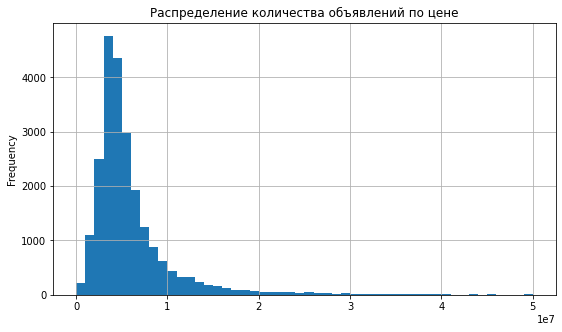

count    2.331500e+04
mean     6.404365e+06
std      7.722398e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      1.908700e+08
Name: last_price, dtype: float64

In [47]:
df_filtered['last_price'].plot(
    kind='hist',
    range=(0, 0.5*10**8),
    bins=50,
    title='Распределение количества объявлений по цене',
    xlabel='Стоимость, руб.',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['last_price'].describe()

На гистограмме представлено нормальное распредление величины `стоимости` объекта недвижимости. Основная часть недвижимости, представленной в данных, имеет `стоимость` примерно от `1 000 000 руб.` до `13 000 000 руб`.

##### Гистограмма количества комнат

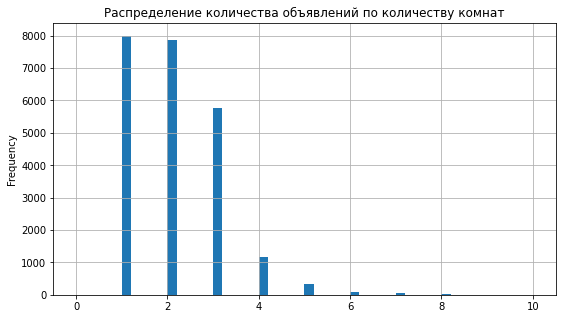

count    23315.000000
mean         2.084109
std          1.055752
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [48]:
df_filtered['rooms'].plot(
    kind='hist',
    range=(0, 10),
    bins=50,
    title='Распределение количества объявлений по количеству комнат',
    xlabel='Количество комнат, руб.',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['rooms'].describe()

Согласно гистограммы большая часть недвижимости, представленной в данных, имеют от `1` до `3 комнат`. Объявлений о продаже недвижимости, имеющей `4 комнаты`, около 1.2 тыс. Недвижимости, имеющей от `6 комнат` и выше на порядок меньше. 

##### Гистограмма высоты потолков

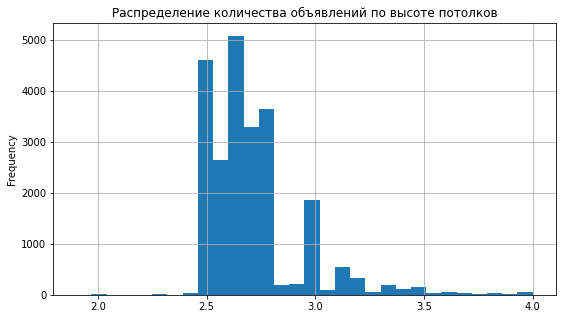

count    23315.000000
mean         2.710032
std          0.254401
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

In [49]:
df_filtered['ceiling_height'].plot(
    kind='hist',
    range=(1.9, 4),
    bins=30,
    title='Распределение количества объявлений по высоте потолков',
    xlabel='Высота потолков, м.',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['ceiling_height'].describe()

После фильтрации и предобработки данных по колонке `['ceiling_height']` значения `высоты потолков` для большей части недвижимости находится в пределах от `2.5 м` до `3.2 м`. Так же на гистограмме отмечается небольшой пик на значении около `3 м`. Такие характерные всплески значений так же могут быть характерны для определнных типов недвижимости или квартир, построенных по определенному проекту (серии).

##### Гистограмма этажа квартиры

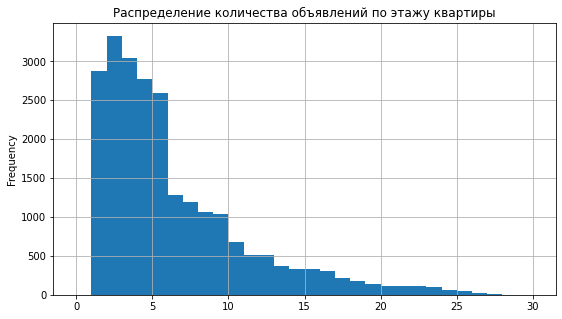

count    23315.000000
mean         5.860519
std          4.850331
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [50]:
df_filtered['floor'].plot(
    kind='hist',
    range=(0, 30),
    bins=30,
    title='Распределение количества объявлений по этажу квартиры',
    xlabel='Этаж',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['floor'].describe()

Большая часть квартир в объявлениях расположены с `1-го` по `9-ый этаж`. Далее, согласно гистограммы, с увеличением `этажа` количество объявлений уменьшается.

##### График по типу этажа квартиры

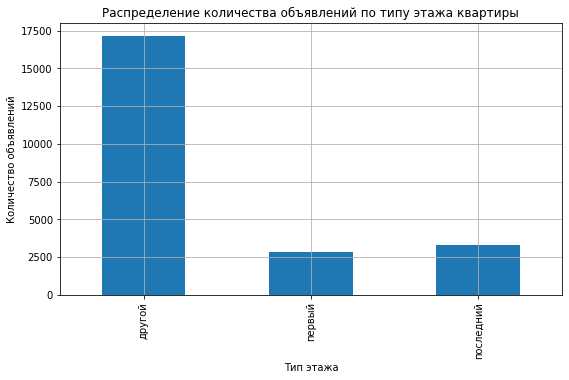

In [51]:
df_filtered.groupby('type_floor')['type_floor'].count().plot(
    kind='bar',
    title='Распределение количества объявлений по типу этажа квартиры',
    xlabel='Тип этажа',
    ylabel='Количество объявлений',
    grid=True,
    figsize=(9, 5)
)

plt.show()

Из графика видно, что больше всего недвижимости в представленных объявлениях расположены на этажах, отличных от первого и последнего (со значением `'другой'`). На `первом этаже` меньше всего объектов недвижимости, находившихся в продаже.

##### Гистограмма общего количества этажей в доме

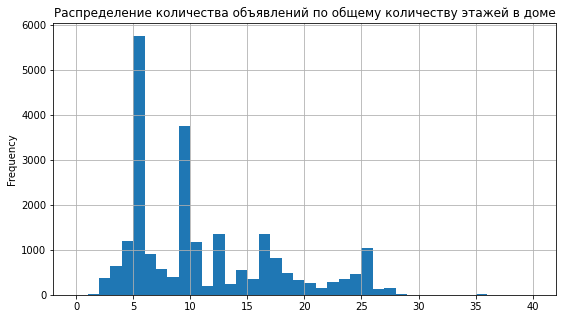

count    23315.000000
mean        10.632726
std          6.551307
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

In [52]:
df_filtered['floors_total'].plot(
    kind='hist',
    range=(0, 40),
    bins=40,
    title='Распределение количества объявлений по общему количеству этажей в доме',
    xlabel='Количество этажей в доме',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['floors_total'].describe()

Исходя из представленного графика есть несколько неравномерных пиков в значениях. Особенно в значениях `5` и `9`. Это соответствует среднестатистическому количеству этажей в домах, расположенных в России (так назваемых 'пятиэтажках' и 'девятиэтажках'). Остальные пики также могут соответствовать домам, построенным по определенным проектам с `определенным количеством этажей`, которых больше по сравнению с нестандартными домами.

##### Гистограмма расстояния до центра города

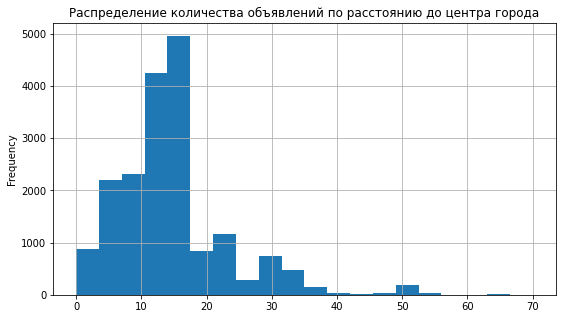

count    18600.000000
mean        14.447527
std          8.621557
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         66.000000
Name: dist_centr_city, dtype: float64

In [53]:
df_filtered['dist_centr_city'].plot(
    kind='hist',
    range=(0, 70),
    bins=20,
    title='Распределение количества объявлений по расстоянию до центра города',
    xlabel='Расстояние до центра города',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['dist_centr_city'].describe()

Большая часть объектов недвижимости в данных находится на расстоянии от `0` до `17 км` от центра города. Предполагая, что большая часть объявлений это объявления о продаже недвижимости, находящейся близко или в черте г.Санкт-Петербург, то распределение на гистограмме соответсвует действительности.

##### Гистограмма расстояния до ближайшего аэропорта

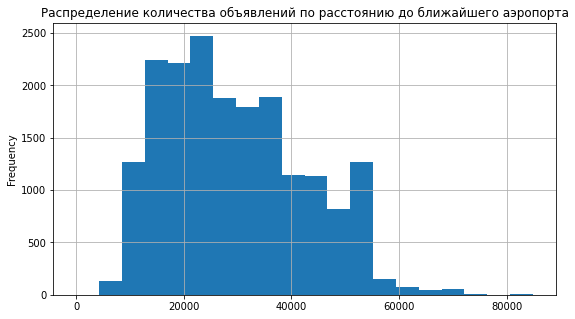

count    18600.000000
mean     29535.294022
std      13040.212760
min          0.000000
25%      18844.000000
50%      27370.000000
75%      38642.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [54]:
df_filtered['airports_nearest'].plot(
    kind='hist',
    #range=(0, 70),
    bins=20,
    title='Распределение количества объявлений по расстоянию до ближайшего аэропорта',
    xlabel='Расстояние до ближайшего эропорта',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['airports_nearest'].describe()

Как и ожидалось большая часть объектов недвижимости в данных находится в пределах `38 км` от ближайшего `аэропорта`. Согласно яндекс-карты единственный аэропорт, доступный для граждан в этом регионе находится от центра г.Санкт-Петербург на расстоянии `17 км`. Если предположить, что большая часть объявлений это объявления о продаже недвижимости, находящейся в черте данного города, то распределение на гистограмме соответсвует действительности.

##### Гистограмма расстояния до ближайшего парка

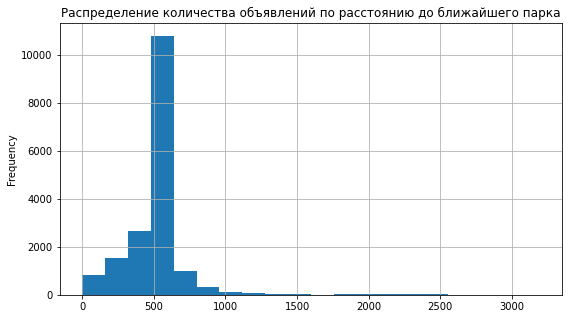

count    17473.000000
mean       491.916738
std        231.418608
min          1.000000
25%        445.000000
50%        498.597886
75%        498.597886
max       3190.000000
Name: parks_nearest, dtype: float64

In [55]:
df_filtered['parks_nearest'].plot(
    kind='hist',
    #range=(0, 4000),
    bins=20,
    title='Распределение количества объявлений по расстоянию до ближайшего парка',
    xlabel='Расстояние до ближайшего парка',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['parks_nearest'].describe()

Большая часть недвижимости, представленных в данных, расположено в пределах `700 м` от `парка`. На гистограмме так же имеется пик на значении в `500 м`. Скорее всего среднестатистически каждый объект для проживания находится рядом с `парком` на расстоянии около `500 м`.

##### Гистограмма дня недели и месяца публикации объявления

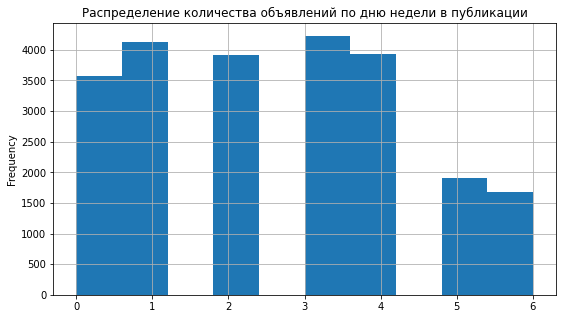

count    23315.000000
mean         2.565945
std          1.789652
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_public, dtype: float64

In [56]:
df_filtered['day_public'].plot(
    kind='hist',
    #range=(0, 4000),
    #bins=20,
    title='Распределение количества объявлений по дню недели в публикации',
    xlabel='День недели',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['day_public'].describe()

Чаще всего объявления публиковалисьв рабочие будние дни с `понедельника` по `пятницу`. Реже - в `субботу` и `воскресенье`.

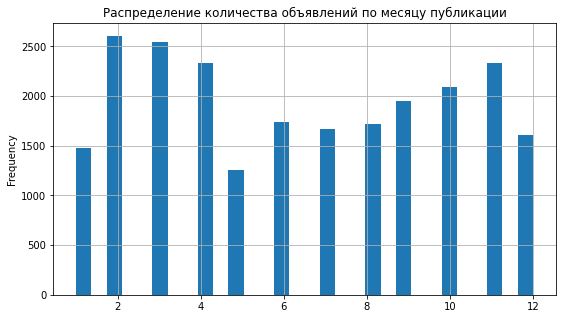

count    23315.000000
mean         6.394167
std          3.491504
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_public, dtype: float64

In [57]:
df_filtered['month_public'].plot(
    kind='hist',
    range=(1, 12),
    bins=30,
    title='Распределение количества объявлений по месяцу публикации',
    xlabel='Месяц',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()
df_filtered['month_public'].describe()

Публикация объявлений согласно гистограммы распределения по `месяцам` имеет волнообразный характер. Объявления реже публиковались в `летний период` и чаще в `зимний`, кроме `декабря` и `января`. 

#### Исследование параметра `['days_exposition']`.

Параметр `['days_exposition']` показывает, сколько дней было размещено каждое объявление.

Перед построением гистограммы распределения рассчитаем `среднее` и `медианное` значение по данному параметру.

In [58]:
df_filtered['days_exposition'].agg(['mean', 'median'])

mean      171.317864
median     93.000000
Name: days_exposition, dtype: float64

`Медианное значение` составляет `93 дня`, таким образом большинство объявлений о продаже недвижимости были закрыты в течение 93-х дней. `Среднее значение` больше `медианного` почти в `2 раза` и составляет `171 день`. Такая разница с `медианным значением` обусловлена влиянием очень продолжительного времени публикации по некоторым объявлениям. Необходимо построить гистограмму для наглядности.b

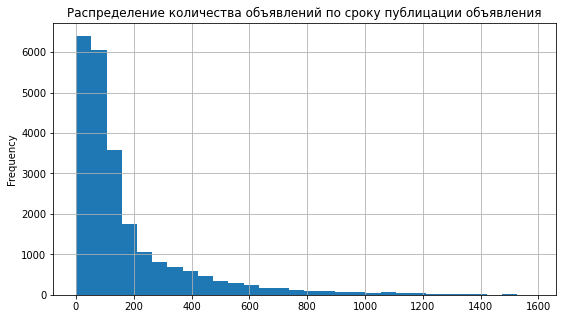

In [59]:
df_filtered['days_exposition'].plot(
    kind='hist',
    #range=(0, 200),
    bins=30,
    title='Распределение количества объявлений по сроку публицации объявления',
    xlabel='Срок публикации, дней',
    ylabel='Количество объявлений',
    figsize=(9, 5),
    grid=True
)

plt.show()

Основная часть объявлений имела `срок публикации` до `200 дней`. Можно предположить что более длинные сроки, связаны с отсутствием спроса на определенные виды жилья, или объявления не были сняты с публикации даже после продажи и еще какое-то время висели в поиске. Как уже было определено ранее на этапе `предобработки` данных в `п.2.1.7`. срок публикации объявления зависит от общей площади и количества комнат соответственно. Повторно выведем эти данные для наглядности.

In [60]:
df[['rooms', 'days_exposition']].groupby('rooms').agg(['median', 'count'])

days_exposition      
               median count
rooms                      
0                50.0   197
1                81.0  8047
2                91.0  7940
3               114.0  5814
4               156.0  1180
5               185.0   326
6               201.0   105
7               138.0    59
8               249.0    12
9               469.0     8
10               44.0     3
11              813.0     2
12              106.0     1
14              256.5     2
15               14.0     1
16             1365.0     1
19              114.0     1

Из таблицы видно, что спрос на недвижимость действительно выше у жилья с наименьшим количеством комнат. Так, для жилья с `комнатами` в количестве `до 3-х`, `срок публикации` составляет до `114 суток`, что очень близко к рассчитанному `медианному значению`. Медианное значение в `50 дней` характерно для недвижимости с количеством комнат равным `0`. Значения ниже `50 дней` можно считать `быстрыми продажами`. Так же можно предполагать, что спрос на жилье зависит и от других параметров (стоимость, этаж, жилая площадь, наличие балконов, планировка и т.д.), которые в свою очередь влияют на показатель `дней публикации`.

**Вывод:**
* стандартная продолжительность публикации составляет `91 день`;
* значения ниже `50 дней` можно считать `быстрыми продажами`;
* значения выше `200 дней` можно считать `необычно долгими`.

#### Факторы больше всего влияющие на общую (полную) стоимость объекта.

##### Общая площадь.

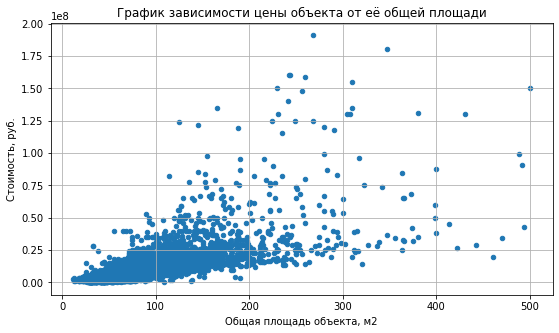

Коэффициент корреляции: 0.7299


In [61]:
df_filtered.plot(
    kind='scatter',
    x='total_area',
    y='last_price',
    title='График зависимости цены объекта от её общей площади',
    xlabel='Общая площадь объекта, м2',
    ylabel='Стоимость, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

# рассчитаем коэффициент корреляции
print(
    'Коэффициент корреляции:', 
    df_filtered['last_price']
    .corr(df_filtered['total_area'])
    .round(4)
) 

Исходя из графика и подсчитанного коэффициента корреляции можно утверждать о наличии `положительной линейной связи` между параметрами `стоимость объекта недвижимости` и `общей площади`. В среднем при увеличении `общей площади` растёт и `стоимость` объекта недвижимости. Стоит отметить так же, что для недвижимости с `общей площадью` более `250 м2` такая связь слабее (`стоимость` имеет более широкий разброс). Но и количество таких объявлений не велико относительно основной совокупности.

##### Жилая площадь.

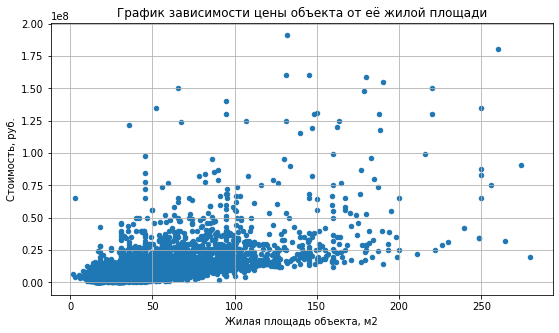

Коэффициент корреляции: 0.6306


In [62]:
df_filtered.plot(
    kind='scatter',
    x='living_area',
    y='last_price',
    title='График зависимости цены объекта от её жилой площади',
    xlabel='Жилая площадь объекта, м2',
    ylabel='Стоимость, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

# рассчитаем коэффициент корреляции
print(
    'Коэффициент корреляции:', 
    df_filtered['last_price']
    .corr(df_filtered['living_area'])
    .round(4)
) 

Как и в случае с параметром `общая площадь` можно утверждать о наличии `положительной линейной связи` между параметрами `стоимость объекта недвижимости` и `жилой площадью`. В среднем при увеличении `жилой площади` растёт и `стоимость` объекта недвижимости. Стоит отметить так же, что для недвижимости с `жилой площадью` более `150 м2` такая связь слабее (`стоимость` имеет более широкий разброс). Но и количество таких объявлений не велико относительно основной совокупности.

##### Площадь кухни.

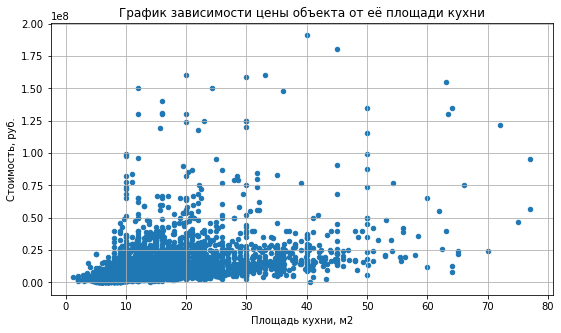

Коэффициент корреляции: 0.5254


In [63]:
df_filtered.plot(
    kind='scatter',
    x='kitchen_area',
    y='last_price',
    title='График зависимости цены объекта от её площади кухни',
    xlabel='Площадь кухни, м2',
    ylabel='Стоимость, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

# рассчитаем коэффициент корреляции
print(
    'Коэффициент корреляции:', 
    df_filtered['last_price']
    .corr(df_filtered['kitchen_area'])
    .round(4)
) 

Как и в случае с параметрами `общая площадь` и `жилая площадь` можно утверждать о наличии `положительной линейной связи` между параметрами `стоимость объекта недвижимости` и `площадью кухни`. В среднем при увеличении `площади кухни` растёт и `стоимость` объекта недвижимости. Стоит отметить так же, что для недвижимости с `площадью кухни` более `45 м2` такая связь слабее (`стоимость` имеет более широкий разброс). Но и количество таких объявлений не велико относительно основной совокупности.

   В целом корреляция `стоимости` по параметру `площадь кухни` ниже, чем по параметру `общая площадь`, но всё же имеет хороший показатель положительной линейной связи. Так же одинаковый характер значений на диаграммах по трём показателям площадей объясняется тем, что `жилая площадь` и `площадь кухни` входят в `общую площадь` и напрямую взаимосвязаны для большинста объектов недвижимости. 

##### Количество комнат.

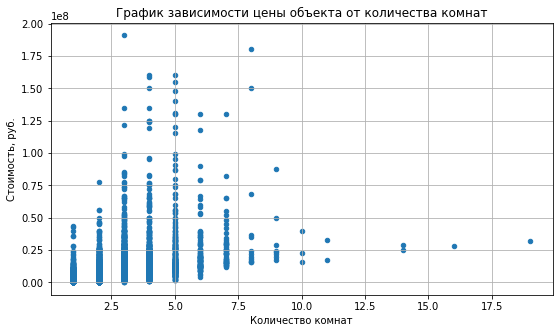

Коэффициент корреляции: 0.4344


In [64]:
df_filtered.plot(
    kind='scatter',
    x='rooms',
    y='last_price',
    title='График зависимости цены объекта от количества комнат',
    xlabel='Количество комнат',
    ylabel='Стоимость, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

# рассчитаем коэффициент корреляции
print(
    'Коэффициент корреляции:', 
    df_filtered['last_price']
    .corr(df_filtered['rooms'])
    .round(4)
) 

Из графика рассеяния и коэфициента корреляции следует вывод о незначительной, но существующей положительной линейной связи между `стоимостью` и `количеством комнат`. Описать эту связь можно так: с увеличением `количества комнат` растет `стоимость` объекта недвижимости, а так же разброс этой `стоимости`, но только до значения в `8 коинат`. Далее связь остается, но разброс `стоимости` нивелируется. Но и объявлений с таким большим `количеством комнат` значительно ниже.

Такую зависимость `стоимости` от `количества комнат` можно объяснить тем, что при увеличении `общей площади`, для большего количества жилья, растёт и `количество комнат`. А связь `стоимости` и `общей площади` имеет прямую связь, как было определено ранее.

##### Этаж на котором расположена квартира

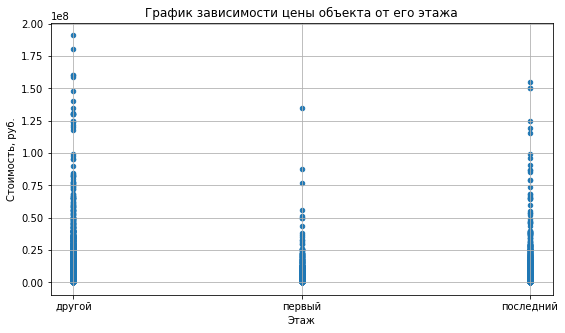

In [65]:
df_filtered.plot(
    kind='scatter',
    x='type_floor',
    y='last_price',
    title='График зависимости цены объекта от его этажа',
    xlabel='Этаж',
    ylabel='Стоимость, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

Линейной зависимости между параметрами `стоимость` и `этаж` не наблюдается.   

##### День недели размещения объявления

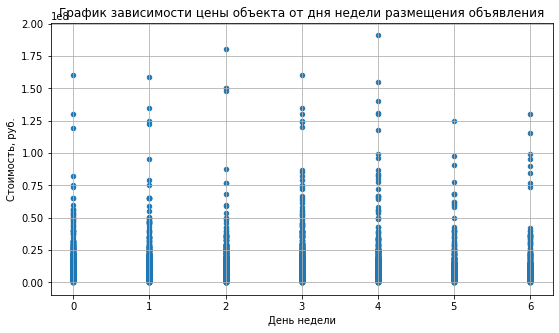

Коэффициент корреляции: -0.0013


In [66]:
df_filtered.plot(
    kind='scatter',
    x='day_public',
    y='last_price',
    title='График зависимости цены объекта от дня недели размещения объявления',
    xlabel='День недели',
    ylabel='Стоимость, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

# рассчитаем коэффициент корреляции
print(
    'Коэффициент корреляции:', 
    df_filtered['last_price']
    .corr(df_filtered['day_public'])
    .round(4)
) 

Линейной зависимости между параметрами `стоимость` и `день недели публикации объявления` не наблюдается.   

##### Месяц размещения объявления

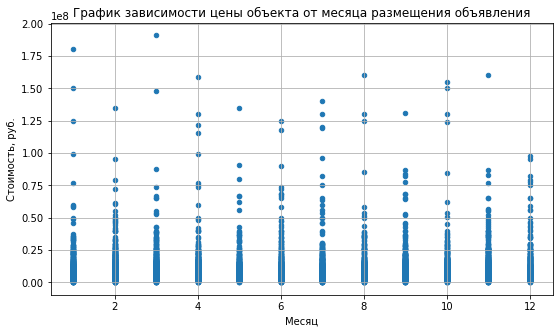

Коэффициент корреляции: 0.005


In [67]:
df_filtered.plot(
    kind='scatter',
    x='month_public',
    y='last_price',
    title='График зависимости цены объекта от месяца размещения объявления',
    xlabel='Месяц',
    ylabel='Стоимость, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

# рассчитаем коэффициент корреляции
print(
    'Коэффициент корреляции:', 
    df_filtered['last_price']
    .corr(df_filtered['month_public'])
    .round(4)
) 

Линейной зависимости между параметрами `стоимость` и `месяц публикации объявления` не наблюдается. 

##### Год размещения объявления

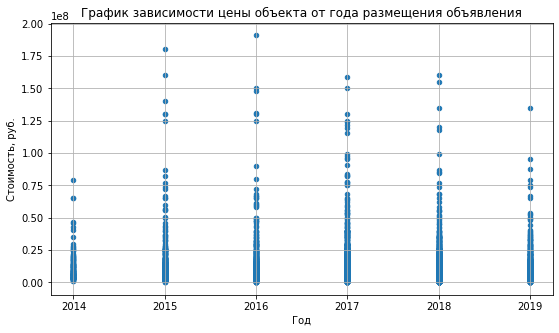

Коэффициент корреляции: -0.0581


In [68]:
df_filtered.plot(
    kind='scatter',
    x='year_public',
    y='last_price',
    title='График зависимости цены объекта от года размещения объявления',
    xlabel='Год',
    ylabel='Стоимость, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

# рассчитаем коэффициент корреляции
print(
    'Коэффициент корреляции:', 
    df_filtered['last_price']
    .corr(df_filtered['year_public'])
    .round(4)
) 

Линейной зависимости между параметрами `стоимость` и `год публикации объявления` не наблюдается. 

#### Средняя цена одного квадратного метра

Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Затем выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `['new_locality_name']`.

In [69]:
# создадим список из 10 населенных пунктов с наибольшим количеством объявлений
top_10_list = (
    df_filtered.groupby(
    'new_locality_name')['new_locality_name']
    .count().sort_values(ascending=False)
    .head(10).index
)

# создадим новый датафрейм где будут только данные по этим 10 населенным пунктам
top_10_df = df_filtered.query('new_locality_name in @top_10_list')

#выведем 3 населённых пункта с самой высокой стоимостью квадратного метра 
display(top_10_df.pivot_table(
    index='locality_name', 
    values='one_sq_m_price', 
    aggfunc='median')
        .sort_values('one_sq_m_price', ascending=False)
        .head(3)
)

#выведем 3 населённых пункта с самой низкой стоимостью квадратного метра 
display(top_10_df.pivot_table(
    index='locality_name', 
    values='one_sq_m_price', 
    aggfunc='median')
        .sort_values('one_sq_m_price', ascending=True)
        .head(3)
)

,one_sq_m_price
locality_name,
Санкт-Петербург,104627.91
Пушкин,100000.00
Кудрово,99761.33


,one_sq_m_price
locality_name,
Выборг,58158.32
Всеволожск,65789.47
Гатчина,67796.61


Самая высокая стоимость одного квадратного метра (более 99 000 руб.) наблюдается у населенных пунктов:
* Санкт-Петербург;
* Пушкин;
* Кудрово.

Самая низкая стоимость одного квадратного метра (менее 68 000 руб.) наблюдается у населенных пунктов:
* Выборг;
* Всеволожск;
* Гатчина.

#### Cредняя цена каждого километра до центра города

Выделим квартиры в Санкт-Петербурге с помощью столбца `['locality_name']` и вычислим `среднюю цену каждого километра` до центра города.

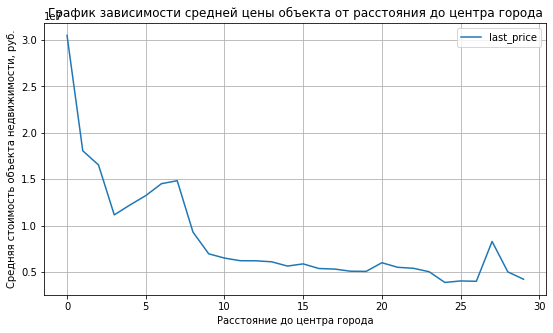

In [70]:
# подсчитаем среднюю цену каждого километра и сформируем новый датафрейм
price_one_km = (
    df_filtered.query('locality_name  == "Санкт-Петербург"')
    .pivot_table(index='dist_centr_city', values='last_price', aggfunc='mean')
)

# построим график
price_one_km.plot(
    title='График зависимости средней цены объекта от расстояния до центра города',
    xlabel='Расстояние до центра города',
    ylabel='Средняя стоимость объекта недвижимости, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

На графике видно что существует прямая зависимость `стоимости жилья` от `расстояния до центра` города. Чем дальше находится объект недвижимости от центра, тем стоимость ниже. Из особенностей выделяется `два пика` и высокая стоимость в самом центре, где цена выше среднего. Скорее всего это связано с тем, что в черте г.Санкт-Петербург есть районы элитного жилья, стоимость которых выше среднего. Либо в данных районах расположены особенные объекты инфраструкутуры, близость к которым увеличивает стоимость объекта. Так что помимо основного центра существует еще несколько локальных центра. Для правильности рассуждений построим такой же график с привязкой к параметру `стоимость одного квадратного метра`.

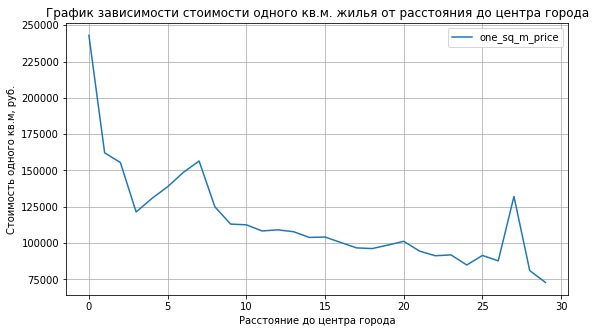

In [71]:
# подсчитаем среднюю цену каждого километра и сформируем новый датафрейм
price_one_km_sqm = (
    df_filtered.query('locality_name  == "Санкт-Петербург"')
    .pivot_table(index='dist_centr_city', values='one_sq_m_price', aggfunc='mean')
)

# построим график
price_one_km_sqm.plot(
    title='График зависимости стоимости одного кв.м. жилья от расстояния до центра города',
    xlabel='Расстояние до центра города',
    ylabel='Стоимость одного кв.м, руб.',
    figsize=(9, 5),
    grid=True
)
plt.show()

График зависимости `стоимости одного кв.м` от `расстояния` до центра так же показывает ранее выявленные закономерности, значит действительно существуют районы в черте г.Санкт-Петербург, где целевые параметры `стоимость одного кв.м.` и `стоимость объекта жилья` имеют высокий показатель.

### Общий вывод

1) При исследовании данных сервиса Яндекс Недвижимость — архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах была проведена работа заполнению пропусков, которые были обработаны и заполнены ближайшими значениями с использованием методов группировки известных значимых признаков. Основная цель при обработке данных - максимально востановить данные без внесения в них искажений, в связи с чем, некоторое количество пропусков было сохранено.

2) Так же были обработаны аномальные значения по количественным данным. Были отброшены значительные выбросы. Отфильитрованные данные были сохранены в отдельный датафрейм `df_filtered`, для сохранения первоначальных данных. 

3) На этапе 3 были подсчитаны и добавлены в таблицу новые параметры:

* Цена одного квадратного метра;
* День недели публикации объявления;
* Месяц публикации объявления;
* Год публикации объявления;
* Тип этажа квартиры (`первый`, `последний`, `другой`);
* Расстояние до центра города в `км`.

Данные параметры позволили провести более детальный анализ для определения зависимостей и закономерностей.

4.1) На этапе исследовательского анализа данных были выявлены следующие особенности в данных:

* большая часть недвижимости из объявлений имеет `общую площадь` около `40-70 м2`. Недвижимости с `общей площадью` до `25 м2` и выше `150 м2` представлено в данных меньше всего;
* Параметр `жилая площадь` в большей части данных имеет значение от `18` до `60 м2`;
* большая часть недвижимости, представленной в данных, имеет `площадь кухни` от `5` до `20 м2`. Присутствует незначительный пик на значении около `6-7 м2`. Это так же как и в случае с жилой площадью может быть характерным значением для определенных объектов недвижимости;
* Основная часть недвижимости, представленной в данных, имеет `стоимость` примерно от `1 000 000 руб.` до `13 000 000 руб`;
* большая часть недвижимости, представленной в данных, имеют от `1` до `3 комнат`. Объявлений о продаже недвижимости, имеющей `4 комнаты`, около 1.2 тыс. Недвижимости, имеющей от `6 комнат` и выше на порядок меньше;
* начения `высоты потолков` для большей части недвижимости находится в пределах от `2.5 м` до `3.2 м`. Так же на гистограмме отмечается небольшой пик на значении около `3 м`. Такие характерные всплески значений так же могут быть характерны для определнных типов недвижимости или квартир, построенных по определенному проекту (серии);
* большая часть квартир в объявлениях расположены с `1-го` по `9-ый этаж`. Далее, согласно гистограммы, с увеличением `этажа` количество объявлений уменьшается. Больше всего недвижимости в представленных объявлениях расположены на этажах, отличных от первого и последнего (со значением `'другой'`). На `первом этаже` меньше всего объектов недвижимости, находившихся в продаже;
* По параметру `количество этажей в доме` есть несколько неравномерных пиков в значениях. Особенно в значениях `5` и `9`. Это соответствует среднестатистическому количеству этажей в домах, расположенных в России (так назваемых 'пятиэтажках' и 'девятиэтажках'). Остальные пики также могут соответствовать домам, построенным по определенным проектам с определенным количеством этажей, которых больше по сравнению с нестандартными домами;
* Большая часть объектов недвижимости в данных находится на расстоянии от `0` до `17 км` от центра города;
* большая часть объектов недвижимости в данных находится в пределах 38 км от ближайшего аэропорта; 
* большая часть объектов недвижимости, представленных в данных, расположено в пределах `700 м` от `парка`. На гистограмме так же имеется пик на значении в `500 м`. Скорее всего среднестатистически каждый объект для проживания находится рядом с `парком` на расстоянии около `500 м`;
* публикация объявлений согласно гистограммы распределения по `месяцам` имеет волнообразный характер. Объявления реже публиковались в `летний период` и чаще в `зимний`, кроме `декабря` и `января`; 
* стандартная продолжительность публикации для большинства объявлений о продаже недвижимости составляет `91 день`. значения ниже `50 дней` можно считать `быстрыми продажами`. Значения выше `200 дней` можно считать `необычно долгими`.

4.2) Были выявлены следующие факторы (параметры/признаки) больше всего влияющие на общую (полную) стоимость объекта (целевой признак): `общая площадь`, `жилая площадь`, `площадь кухни`, `количество комнат`. Данные факторы имеют прямую линейную взаимосвязь с целевым параметром `стоимост`.

4.3) Была определена средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Затем были найдены населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

Самая высокая стоимость одного квадратного метра (более 99 000 руб.) наблюдается у населенных пунктов:
* Санкт-Петербург;
* Пушкин;
* Кудрово.

Самая низкая стоимость одного квадратного метра (менее 68 000 руб.) наблюдается у населенных пунктов:
* Выборг;
* Всеволожск;
* Гатчина.

4.4) Одним из главных определяющих факторов в формировании `стоимости одного квадратного метра` (и `стоимости объекта` недвижимости в целом) в г.Санкт-Петербург является `расстояние до центра города`. Чем дальше находится объект недвижимости от центра, тем стоимость ниже. Из особенностей выделяется `два пика` и высокая стоимость в самом центре, где цена выше среднего. Скорее всего это связано с тем, что в черте г.Санкт-Петербург есть районы элитного жилья, стоимость которых выше среднего. Либо в данных районах расположены особенные объекты инфраструкутуры, близость к которым увеличивает стоимость объекта. Так что помимо основного центра существует еще несколько локальных центра. 

**Рекомендации по результатам исследования:**

* определить причину пропусков в картографических данных, заполняемых автоматической системой;
* для приведения пользовательских данных к общему ввиду, сформировать выпадающие списки с наименованиями населенных пунктов. Таким образом будут исключены не явные дубликаты по колонке `['locality_name']`;
* по параметрам, имеющим булев тип (признак `апартаментов` например) изначально указывать стандартные значения. Например, большая часть объявлений с неккомерческим жильем, поэтому пользователь скоррее всего не будет отвлекаться на данный параметр при заполнении объявления. Таким образом в базу данных автоматичски попадет правильное значение `False` (флаг, обозначающий, что жилье имеет статус не коммерческого).